In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# Office products

In [4]:
file_path1='/content/drive/MyDrive/cleaned_office_and sentiment.csv'

office_df=pd.read_csv(file_path1,parse_dates=['date'])
office_df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,title,main_category,sub_category,date,year,Helpful,total_votes,unhelpful_votes,review,cleaned_text,polarity,sentiment
0,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",5.0,1359417600,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,Office Products,Office & School Supplies,2013-01-29,2013,0,0,0,even though they were refurbished the colors w...,even though refurbished color vivid cartridge ...,0.291667,Positive
1,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]",3.0,1318723200,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,Office Products,Office & School Supplies,2011-10-16,2011,0,0,0,"A good deal and I can make them work ok, BUT I...",good deal make work ok live dry climate tend d...,0.106881,Neutral
2,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",5.0,1356912000,23.242188,Harry Potter Lenticular Hologram Bookmark - Ha...,Office Products,Office & School Supplies,2012-12-31,2012,0,0,0,Nice added stocking stuffer. Beautiful additi...,nice added stocking stuffer beautiful addition...,0.766667,Positive
3,AI7SARYVM8FGA,0439394058,A. Manternach,"[5, 5]",4.0,1212624000,11.640000,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products,Office & School Supplies,2008-06-05,2008,5,5,0,"Nice size, colorful simple pictures and a nice...",nice size colorful simple picture nice font wi...,0.500000,Positive
4,A1BUVOGGFTGMBN,0439394058,ANON,"[5, 5]",2.0,1389744000,11.640000,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products,Office & School Supplies,2014-01-15,2014,5,5,0,This is not coated in plastic as the descripti...,coated plastic description indicates thin card...,-0.212500,Negative


In [5]:
office_df.dropna(inplace=True)

In [6]:
office_df.isna().sum()

reviewerID         0
asin               0
reviewerName       0
helpful            0
overall            0
unixReviewTime     0
price              0
title              0
main_category      0
sub_category       0
date               0
year               0
Helpful            0
total_votes        0
unhelpful_votes    0
review             0
cleaned_text       0
polarity           0
sentiment          0
dtype: int64

In [7]:
# making the data to seperate columns based on the sentiment
office_df=pd.crosstab(office_df['date'],office_df['sentiment'])
office_df=office_df.resample('M').sum()
office_df.head()


sentiment,Negative,Neutral,Positive
date,,,
1998-08-31,0,0,1
1998-09-30,0,0,0
1998-10-31,0,0,0
1998-11-30,0,0,0
1998-12-31,0,0,0


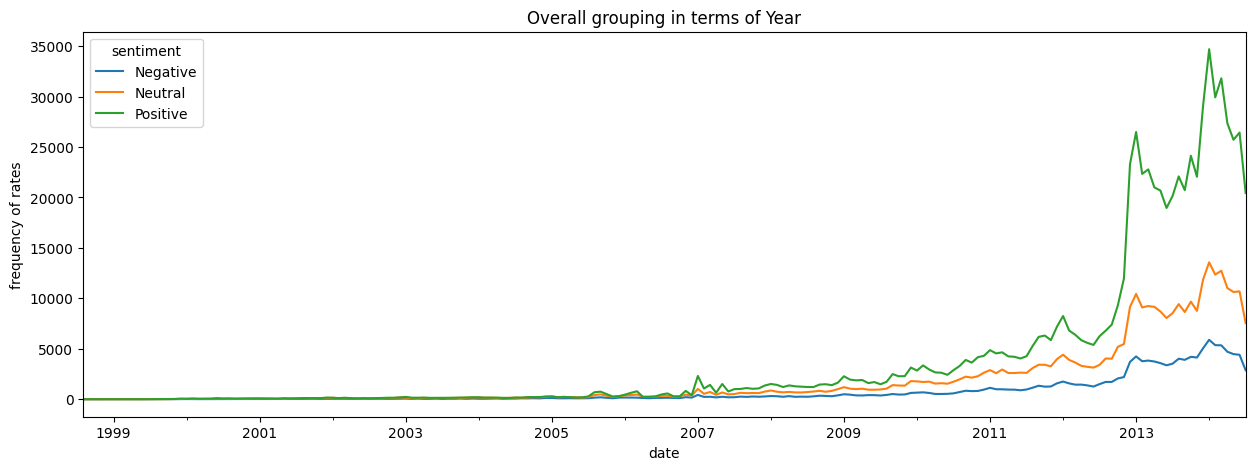

In [8]:
office_df.plot(kind = 'line', figsize= (15, 5))
plt.ylabel('frequency of rates')
plt.title ('Overall grouping in terms of Year');

In [ ]:
office_df.dtypes

sentiment
Negative    int64
Neutral     int64
Positive    int64
dtype: object

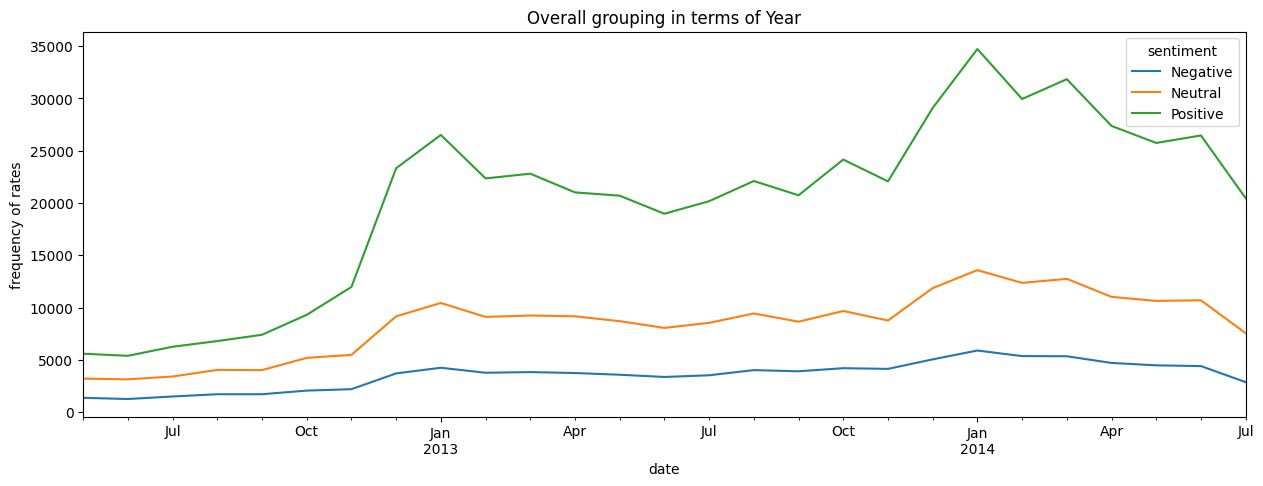

In [9]:
# as we have very much less data before 2010 ,so we are filtering the data before 2010

office_df=office_df[office_df.index>='2012-05-01']
office_df.plot(kind = 'line', figsize= (15, 5))
plt.ylabel('frequency of rates')
plt.title ('Overall grouping in terms of Year');


In [10]:
# and also we are spliting it on the basis of sentiment

positive=office_df['Positive']
neutral=office_df['Neutral']
negative=office_df['Negative']

## On positive sentiment

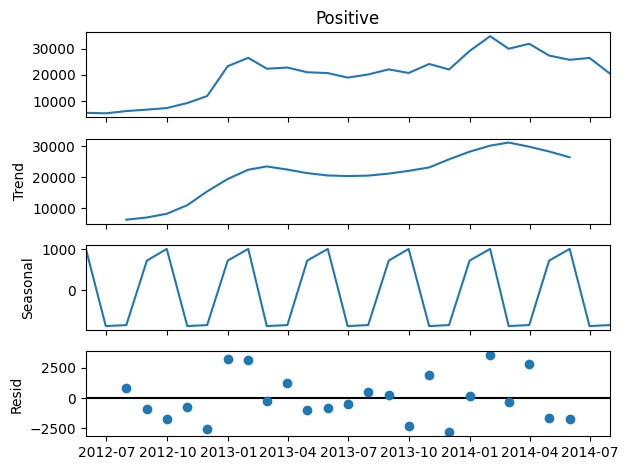

In [ ]:
decomp=seasonal_decompose(positive,period=4)

decomp.plot();


In [11]:
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        result = "Data is Stationary"
    else:
        result = "Data is not Stationary."

    return(result),pvalue

In [ ]:
checkStationarity(positive)

('Data is not Stationary.', 0.3794907200571136)

In [ ]:
# differnciating for making it more stationary
positive_d=positive.diff().dropna()

In [ ]:
# checking the stationary again
checkStationarity(positive_d)

('Data is not Stationary.', 0.3534735309189682)

In [ ]:
# Calculate a 4-day moving average
window = 4
positive_m = positive.rolling(window=window).mean().dropna()

In [ ]:
checkStationarity(positive_m)

('Data is Stationary', 1.2394958204087862e-10)

<Axes: xlabel='date'>

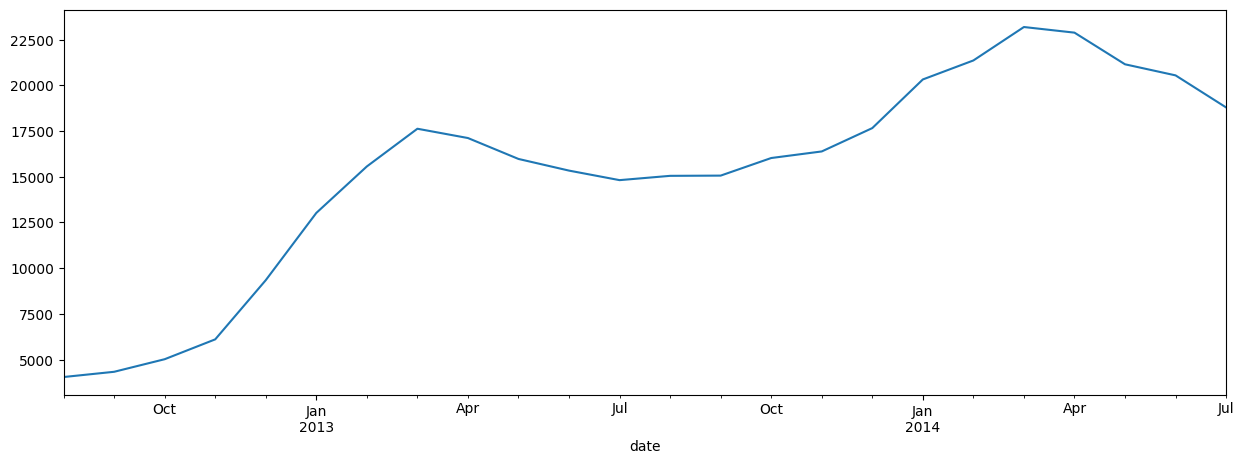

In [ ]:
positive_m.plot(kind = 'line', figsize= (15, 5))

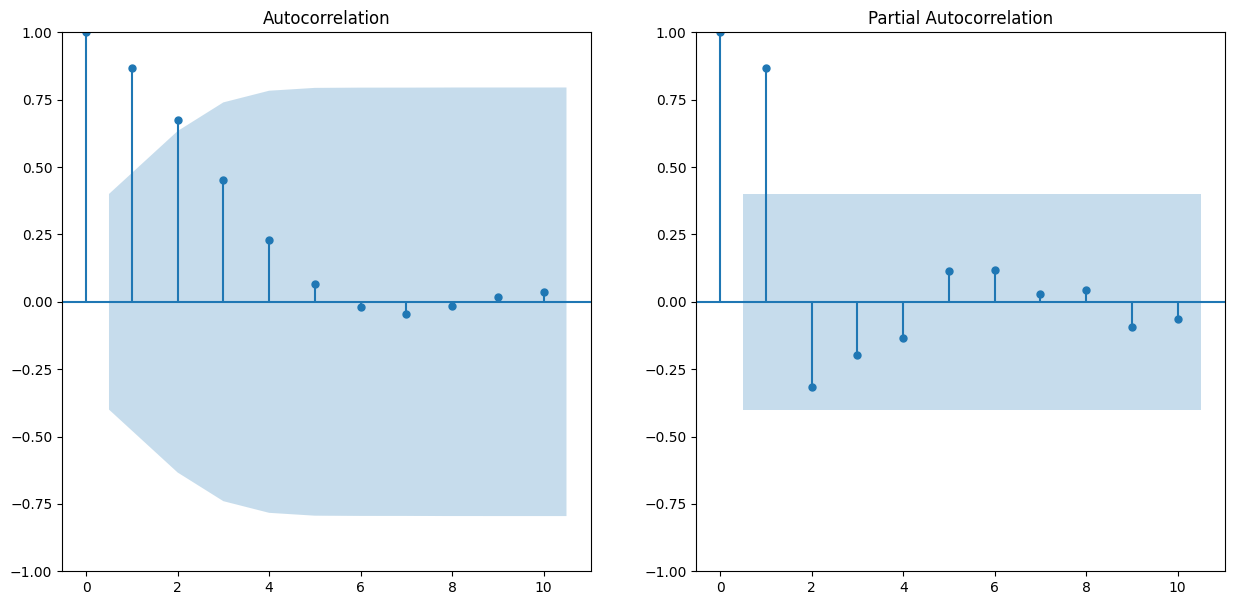

In [ ]:

#plotting correlogram for positive sentiment data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(positive_m,lags=10,ax=ax[0])
plot_pacf(positive_m,lags=10,ax=ax[1])
plt.show()

 * by analysing the both graphs we will take

 ** p=[0,1,2]
 ** d=0
 ** q=[0,1,2]

In [ ]:
# as this data is having seanoality
# we will be doning the sarimax model

seasonal_positive=decomp.seasonal

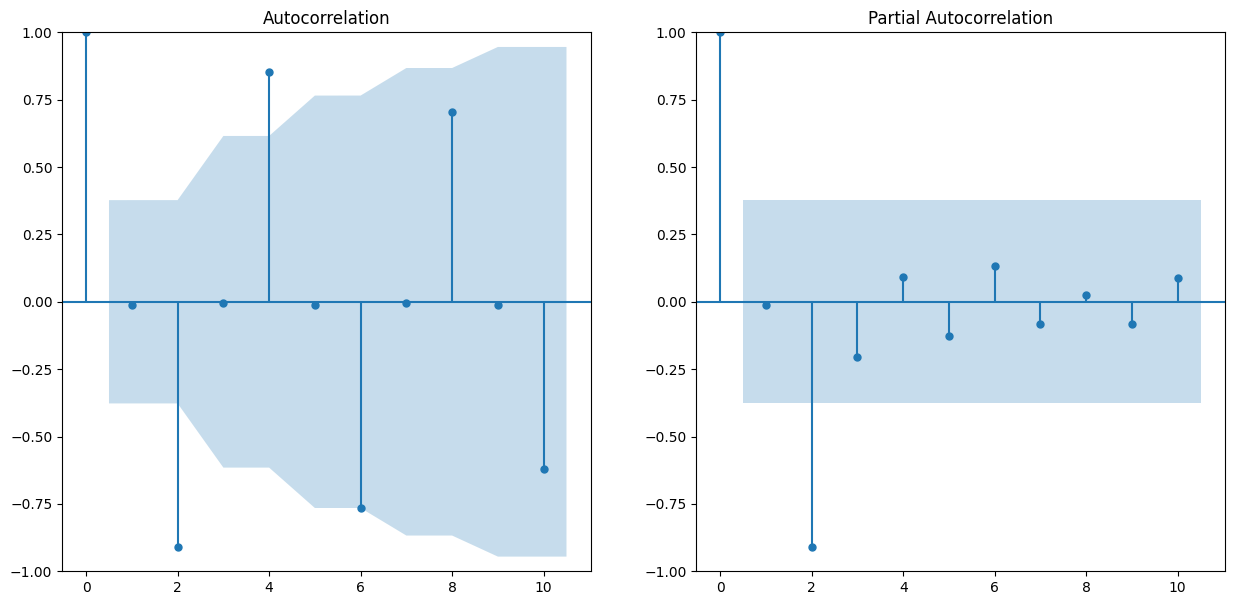

In [ ]:

#plotting correlogram for seasonality
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(seasonal_positive,lags=10,ax=ax[0])
plot_pacf(seasonal_positive,lags=10,ax=ax[1])
plt.show()

Positive sentiment data P,D,Q values

* P=[0,1]
* D=0
* Q=[0,1]

In [ ]:
# spliting the data to train and test
samp_size=int(len(positive_m)*0.7)
train_p=positive_m[:samp_size]
test_p=positive_m[samp_size:]

In [ ]:
# Define ranges for p, d, q, P, D, Q
p_range = range(3)
q_range = range(3)
P_range = range(2)
Q_range = range( 2)

In [ ]:
# Initialize lists to store results
results_aic = []


# Loop through all combinations of orders
for p,  q, P,  Q in product(p_range, q_range, P_range, Q_range):
    try:
        model = sm.tsa.SARIMAX(positive_m, order=(p, 0, q), seasonal_order=(P, 0, Q, 12), enforce_stationarity=False)
        results = model.fit()
        results_aic.append((p, q, P, Q, results.aic))
    except:
        continue

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [ ]:
# Create dataframes from results
columns = ['p', 'q', 'P',  'Q', 'AIC']
df_aic = pd.DataFrame(results_aic, columns=columns)


In [ ]:
df_aic=df_aic.sort_values(by=['AIC'],ascending=True)
df_aic.head()

,p,q,P,Q,AIC
21,1,2,0,1,156.223723
35,2,2,1,1,160.705211
23,1,2,1,1,161.271434
33,2,2,0,1,161.865480
11,0,2,1,1,167.974250


In [21]:

# defining the model for Time series analysis plot
def TSAplots(data,train,test,p,d,q,P,Q,D,title="Trend of Positive Sentiment Count Prime Pantry"):
    global m2_pos
    m2_pos=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
    f2_pos=m2_pos.forecast(len(test))
    new_model_pos=SARIMAX(data,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
    fc_pos=new_model_pos.forecast(10)
    plt.subplots(figsize=(12,8))
    plt.plot(data,color='orange',label='Actual')
    plt.plot(fc_pos.combine_first(data[:-2:-1]),color='green',label='Forecast') #Combine two DataFrame objects by filling null values in one DataFrame with non-null
    plt.plot(f2_pos,color='blue',label='Predicted')                        #values from other DataFrame
    plt.title(title,fontsize=14)
    plt.xlabel('Time Period (Monthly)',fontsize=12)
    plt.ylabel('Count of Sentiment',fontsize=12)
    plt.legend(loc='upper left')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


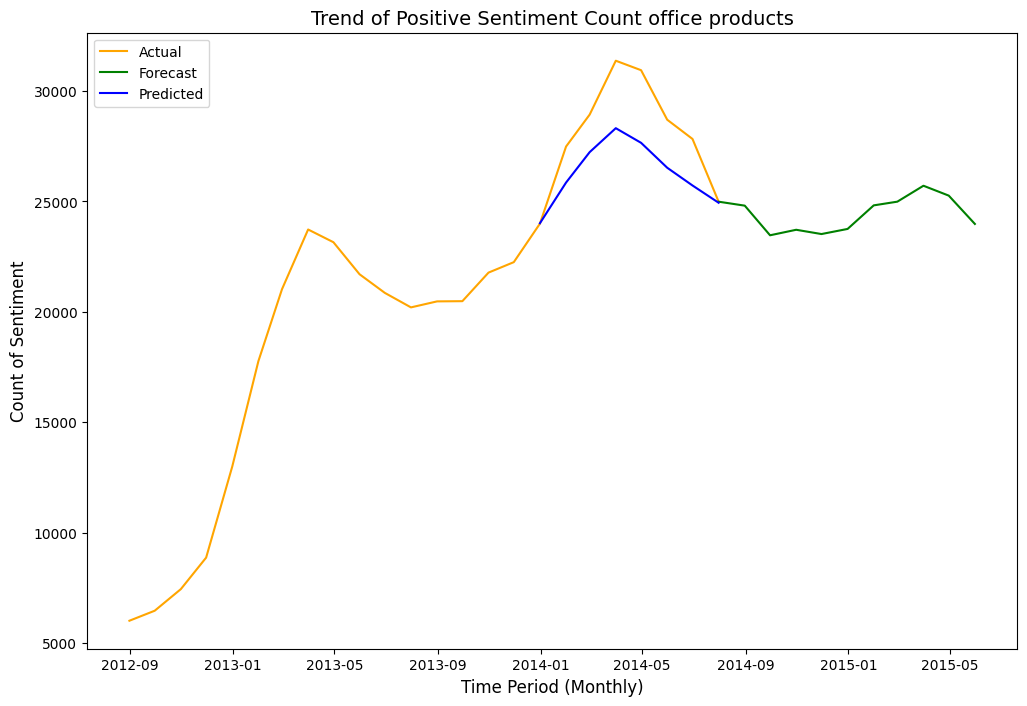

In [ ]:
# Time Series Analysis plot for Actual,Predicted and Forecast
TSAplots(data=positive_m,train=train_p,test=test_p,p=1,d=0,q=2,P=2,Q=1,D=0,title="Trend of Positive Sentiment Count office products")


In [ ]:

#perform Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")


Fail-to-Reject H0. Good model


In [ ]:
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Positive   No. Observations:                   16
Model:             SARIMAX(1, 0, 2)x(2, 0, [1], 12)   Log Likelihood                -134.930
Date:                              Fri, 18 Aug 2023   AIC                            283.860
Time:                                      15:04:58   BIC                            289.269
Sample:                                  08-31-2012   HQIC                           284.137
                                       - 11-30-2013                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9979      0.801      1.246      0.213      -0.572       2.568
ma.L1          0.8899      0.314      2.838      0.005       0.275       1.504
ma.L2          0.5409      0.305      1.771      0.077      -0.058       1.140
ar.S.L12       1.5319      4.590      0.334      0.739      -7.465      10.529
ar.S.L24      -0.9032      2.719     -0.332      0.740      -6.231       4.425
ma.S.L12      -0.9603     35.270     -0.027      0.978     -70.088      68.168
sigma2      1.582e+05      0.000   3.87e+08      0.000    1.58e+05    1.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.89   Prob(JB):                         0.93
Heteroskedasticity (H):               0.33   Skew:                             0.06
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.94e+26. Standard errors may be unstable.
"""

## Analysis on neutral sentiment

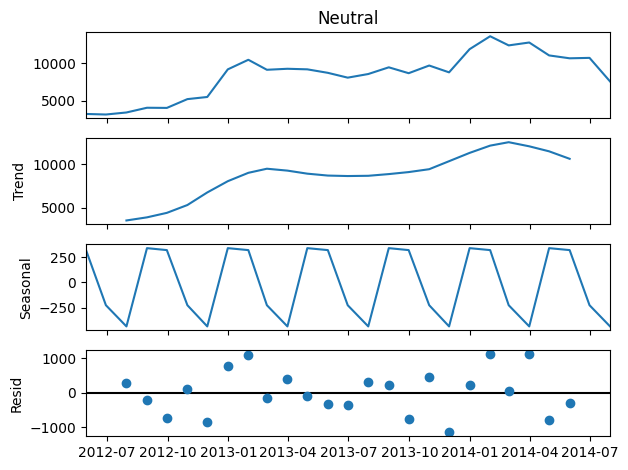

In [12]:
decomp_n=seasonal_decompose(neutral,period=4)

decomp_n.plot();

In [13]:
# checking stationarity

checkStationarity(neutral)

('Data is not Stationary.', 0.3477689422815144)

In [14]:
# similarly doing as in the case for positive
# Calculate a 4-day moving average
window = 4
neutral_m= neutral.rolling(window=window).mean().dropna()



checkStationarity(neutral_m)

('Data is Stationary', 0.003419797191078404)

<Axes: xlabel='date'>

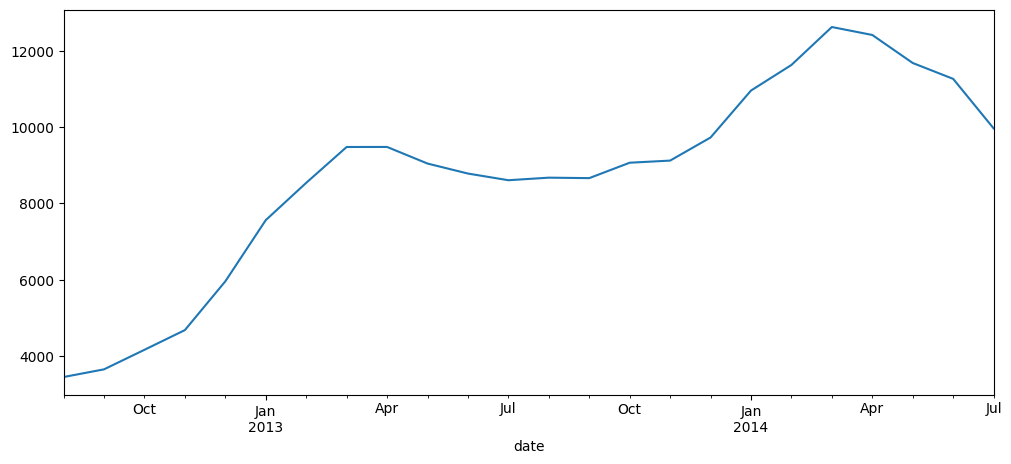

In [15]:
neutral_m.plot(kind='line',figsize=(12,5))

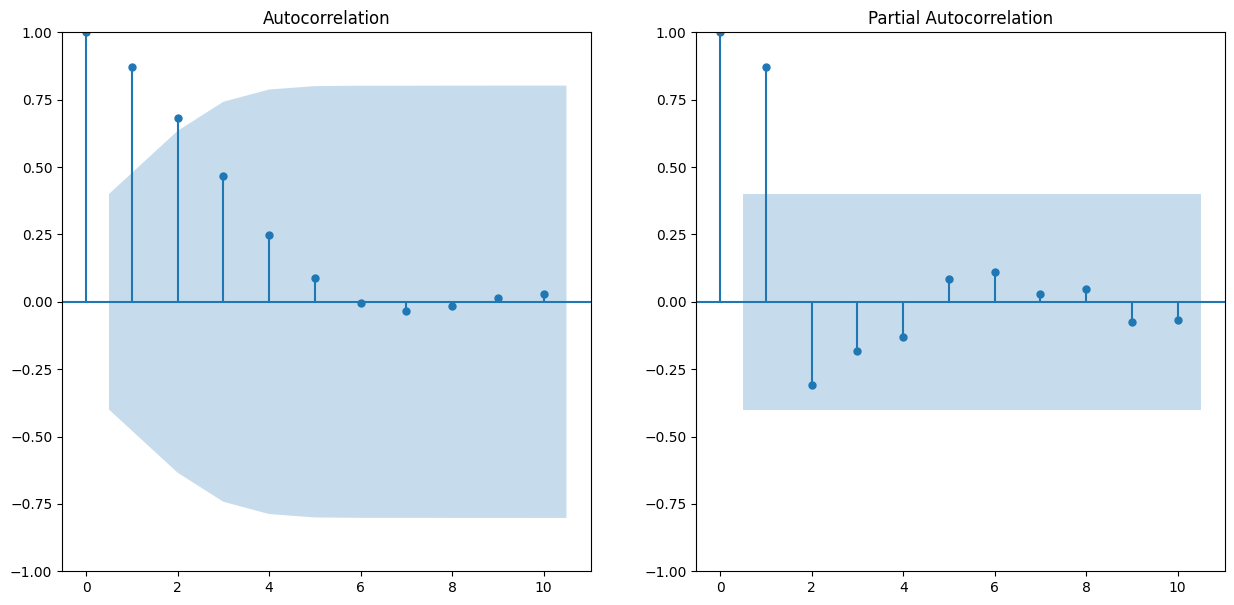

In [ ]:
#plotting correlogram for positive sentiment data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(neutral_m,lags=10,ax=ax[0])
plot_pacf(neutral_m,lags=10,ax=ax[1])
plt.show()

by analysing the both graphs we will take

* p=[1,2,3]
* d=0
* q=[1,2,3]

In [ ]:
# as this data is having seanoality
# we will be doning the sarimax model

seasonal_neutral=decomp_n.seasonal

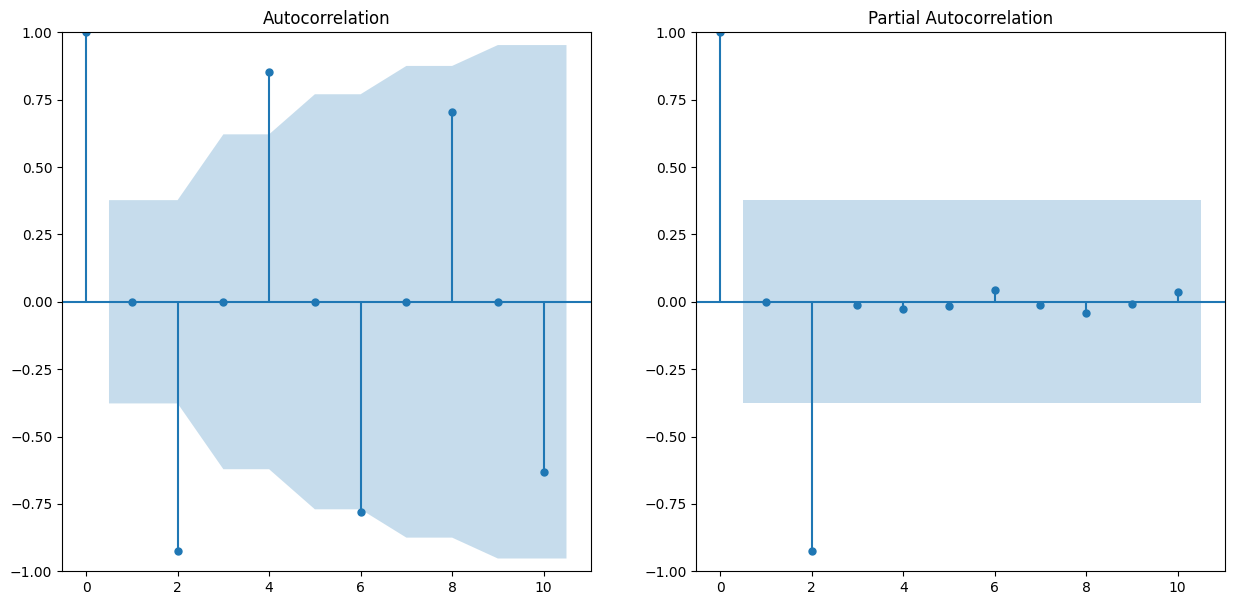

In [ ]:
#plotting correlogram for seasonality
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(seasonal_neutral,lags=10,ax=ax[0])
plot_pacf(seasonal_neutral,lags=10,ax=ax[1])
plt.show()

by analysing the both graphs we will take

* p=[1,2,3]
* d=0
* q=[1,2,3]


In [16]:
# spliting the data to train and test
samp_size=int(len(neutral_m)*0.7)
train_nu=neutral_m[:samp_size]
test_nu=neutral_m[samp_size:]

In [17]:
# Define ranges for p, d, q, P, D, Q
p_range = range(1,3)
q_range = range(1,3)
P_range = range(1,4)
Q_range = range(1,4)

In [18]:
# Initialize lists to store results
results_aic = []


# Loop through all combinations of orders
for p,  q, P,  Q in product(p_range, q_range, P_range, Q_range):
    try:
        model_2 = sm.tsa.SARIMAX(neutral_m, order=(p, 0, q), seasonal_order=(P, 0, Q, 12), enforce_stationarity=False)
        results = model_2.fit()
        results_aic.append((p, q, P, Q, results.aic))
    except:
        continue

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
# Create dataframes from results
columns = ['p', 'q', 'P',  'Q', 'AIC']
df_aic_neu = pd.DataFrame(results_aic, columns=columns)

df_aic_neu=df_aic_neu.sort_values(by=['AIC'],ascending=True)
df_aic_neu.head()

,p,q,P,Q,AIC
1,1,1,1,2,12.0
3,1,1,2,1,12.0
2,1,1,1,3,14.0
4,1,1,2,2,14.0
6,1,1,3,1,14.0


In [ ]:
df_aic_neu.tail()

,p,q,P,Q,AIC
35,2,2,3,3,22.000000
9,1,2,1,1,153.918869
27,2,2,1,1,155.240471
0,1,1,1,1,165.048430
18,2,1,1,1,167.173958


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


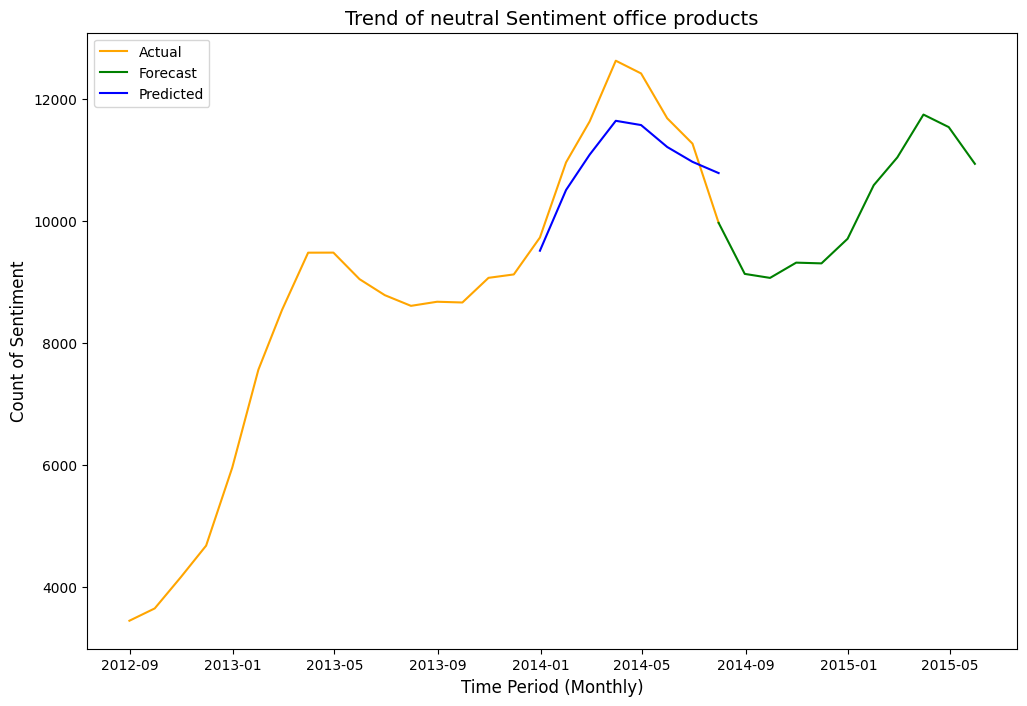

In [22]:
# Time Series Analysis plot for Actual,Predicted and Forecast
TSAplots(data=neutral_m,train=train_nu,test=test_nu,p=1,d=0,q=1,P=2,Q=1,D=0,title="Trend of neutral Sentiment office products")

In [ ]:
#perform Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


## Analysis on negative sentiment

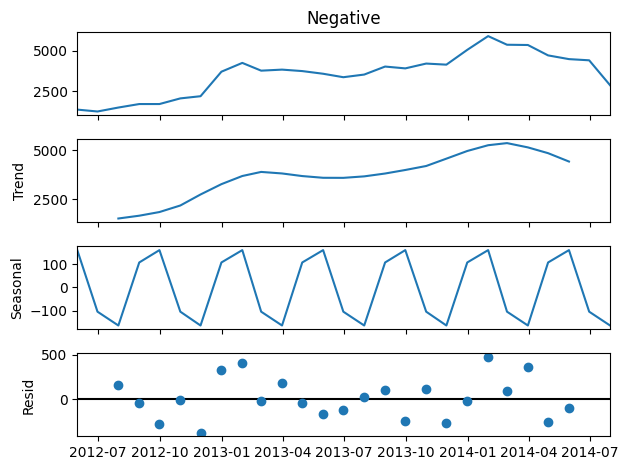

In [ ]:
decomp_neg=seasonal_decompose(negative,period=4)

decomp_neg.plot();

In [ ]:
# checking stationarity

checkStationarity(negative)

('Data is not Stationary.', 0.4170100368512937)

In [23]:
# Calculate a 4-day moving average
window = 5
negative_m= negative.rolling(window=window).mean().dropna()



checkStationarity(negative_m)

('Data is Stationary', 1.1182627126360622e-10)

<Axes: xlabel='date'>

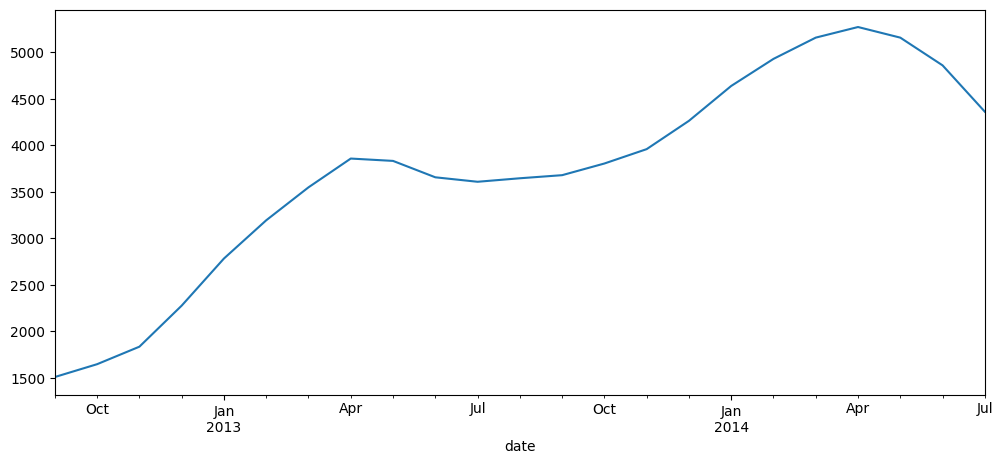

In [24]:
negative_m.plot(kind='line',figsize=(12,5))

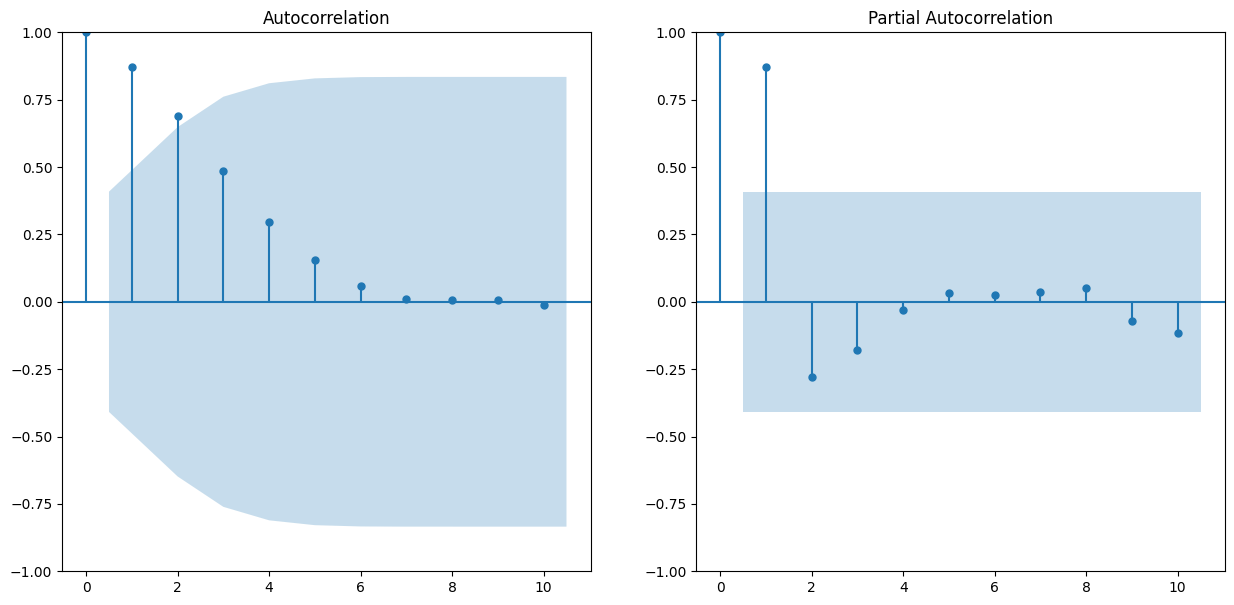

In [ ]:
#plotting correlogram for positive sentiment data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(negative_m,lags=10,ax=ax[0])
plot_pacf(negative_m,lags=10,ax=ax[1])
plt.show()

by analysing the both graphs we will take

* p=[2,3,4]
* d=0
* q=[1,2,3]

In [ ]:
seasonal_negative=decomp_neg.seasonal

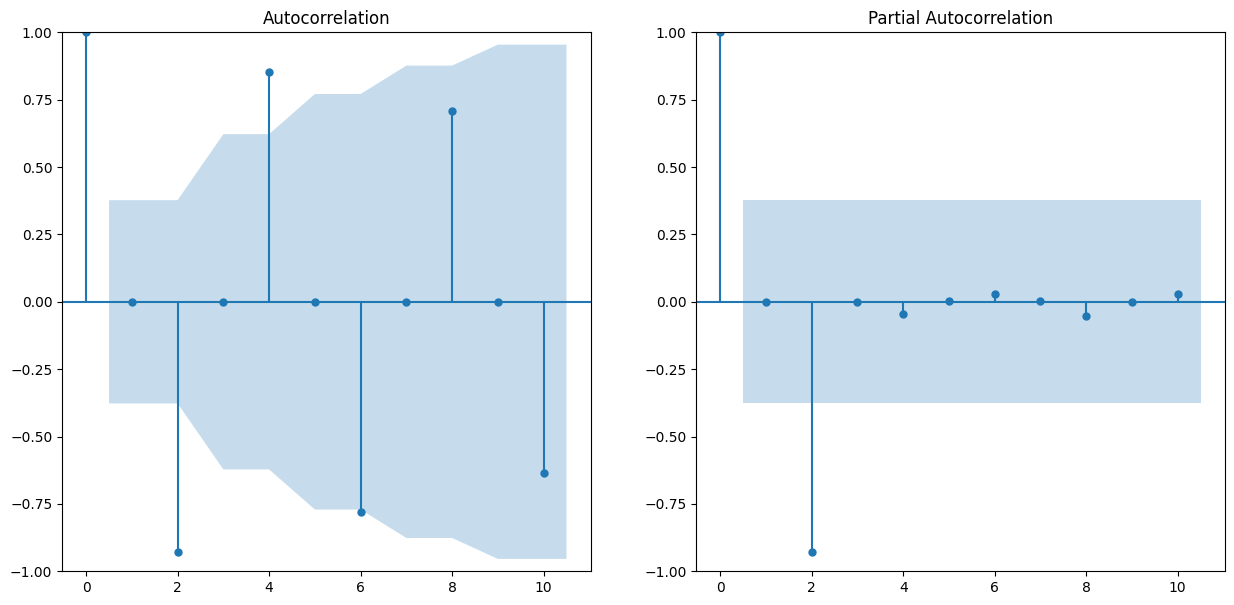

In [ ]:
#plotting correlogram for negative seasonal sentiment data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(seasonal_negative,lags=10,ax=ax[0])
plot_pacf(seasonal_negative,lags=10,ax=ax[1])
plt.show()

by analysing the both graphs we will take

* p=[1,2,3,]
* d=0
* q=[1,2,3]

In [25]:
# spliting the data to train and test
samp_size=int(len(negative_m)*0.7)
train_ne=negative_m[:samp_size]
test_ne=negative_m[samp_size:]

In [26]:
# Define ranges for p, d, q, P, D, Q
p_range = range(2, 5)
q_range = range(1, 4)
P_range = range(1, 4)
Q_range = range(1, 4)

In [27]:
# Initialize lists to store results
results_aic = []


# Loop through all combinations of orders
for p,  q, P,  Q in product(p_range, q_range, P_range, Q_range):
    try:
        model = sm.tsa.SARIMAX(test_ne, order=(p, 0, q), seasonal_order=(P, 0, Q, 12), enforce_stationarity=False)
        results = model.fit()
        results_aic.append((p, q, P, Q, results.aic))
    except:
        continue

In [28]:
# Create dataframes from results
columns = ['p', 'q', 'P',  'Q', 'AIC']
df_aic_neg = pd.DataFrame(results_aic, columns=columns)

df_aic_neg=df_aic_neg.sort_values(by=['AIC'],ascending=True)
df_aic_neg.head()

,p,q,P,Q,AIC
0,2,1,1,1,12.0
1,2,1,1,2,14.0
3,2,1,2,1,14.0
27,3,1,1,1,14.0
9,2,2,1,1,14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


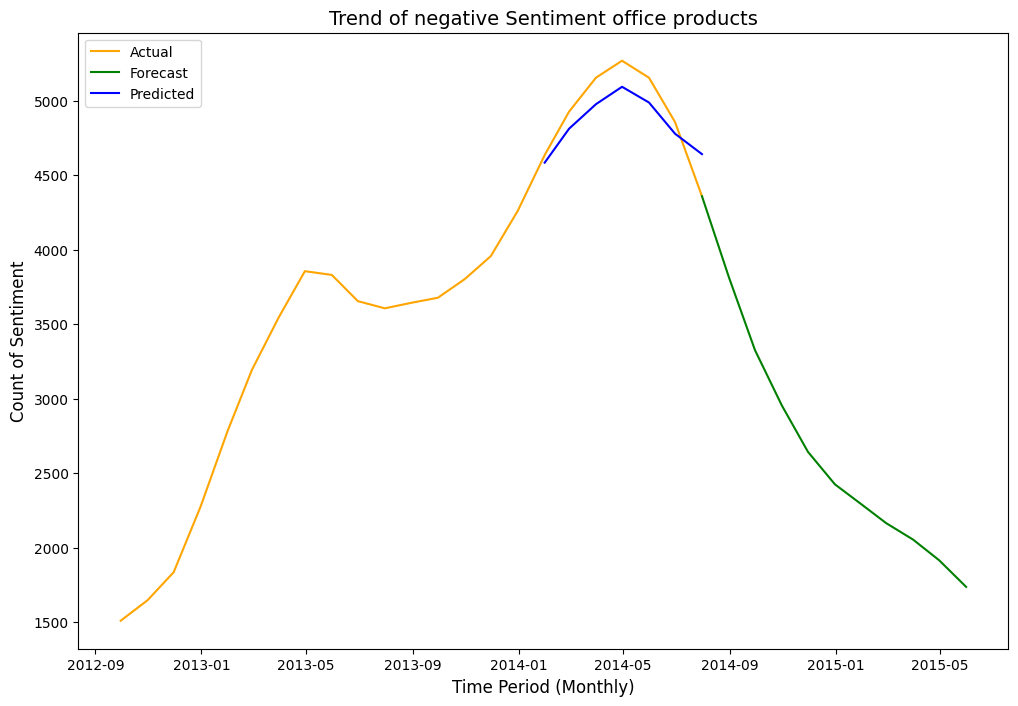

In [29]:
# Time Series Analysis plot for Actual,Predicted and Forecast
TSAplots(data=negative_m,train=train_ne,test=test_ne,p=2,d=0,q=1,P=1,Q=1,D=0,title="Trend of negative Sentiment office products")

In [ ]:
#perform Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [ ]:
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Negative   No. Observations:                   16
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -101.551
Date:                            Fri, 18 Aug 2023   AIC                            215.101
Time:                                    15:24:53   BIC                            219.737
Sample:                                09-30-2012   HQIC                           215.339
                                     - 12-31-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7479      0.458      3.816      0.000       0.850       2.646
ar.L2         -0.7602      0.470     -1.616      0.106      -1.682       0.162
ma.L1          0.5351      0.650      0.823      0.411      -0.739       1.809
ar.S.L12       0.5560      3.587      0.155      0.877      -6.474       7.586
ma.S.L12       0.1043      5.872      0.018      0.986     -11.405      11.613
sigma2      9612.6849   1.03e+04      0.929      0.353   -1.07e+04    2.99e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.75
Prob(Q):                              0.82   Prob(JB):                         0.01
Heteroskedasticity (H):               0.22   Skew:                            -0.70
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Cd and Vinyl

In [ ]:
file_path_2='/content/drive/MyDrive/cleaned_cd.csv'

cd_df=pd.read_csv(file_path_2,parse_dates=['date'])
cd_df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,main_category,sub_category,Helpful,not_Helpful,date,year,review,cleaned_text,polarity,sentiment
0,A8KQVSFUOXV94,B000025RE0,*G*,"[18, 18]",5.0,952819200,17.301576,CDs & Vinyl,Children's Music,18,18,2000-03-12,2000,I LOVE dancing so much and thought this would ...,love dancing much thought would great video ge...,0.353571,Positive
1,A1Z4VJLNXFJB35,B000025RE0,brent c holmes,"[4, 5]",5.0,946080000,17.301576,CDs & Vinyl,Children's Music,4,5,1999-12-25,1999,"Hello, if you love to dance and, you love crea...",hello love dance love creative dance step youl...,0.498636,Positive
2,A2TJQC03EHXVMO,B000025RE0,Danielle,"[5, 7]",5.0,943920000,17.301576,CDs & Vinyl,Children's Music,5,7,1999-11-30,1999,I have been waiting for this video for months....,waiting video month excited fatima robinson be...,0.495833,Positive
3,A2ZMN85Z1M25JE,B000025RE0,"""laguy03""","[0, 0]",5.0,952732800,17.301576,CDs & Vinyl,Children's Music,0,0,2000-03-11,2000,I never thought that this video would be this ...,never thought video would great awesomei huge ...,0.666667,Positive
4,A1N0Y0SXYD831C,B000025RE0,Jannita,"[9, 12]",5.0,1035504000,17.301576,CDs & Vinyl,Children's Music,9,12,2002-10-25,2002,I know that if a big gurl like me can bust a m...,know big gurl like bust move club using fatima...,0.233333,Neutral


In [ ]:
cd_df.dropna(inplace=True)

In [ ]:
cd_df.isna().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
overall           0
unixReviewTime    0
price             0
main_category     0
sub_category      0
Helpful           0
not_Helpful       0
date              0
year              0
review            0
cleaned_text      0
polarity          0
sentiment         0
dtype: int64

In [ ]:
# making the data to seperate columns based on the sentiment
cd_df=pd.crosstab(cd_df['date'],cd_df['sentiment'])
cd_df=cd_df.resample('M').sum()
cd_df.head()


sentiment,Negative,Neutral,Positive
date,,,
1997-08-31,0,0,1
1997-09-30,0,0,3
1997-10-31,0,4,1
1997-11-30,0,3,7
1997-12-31,1,5,6


<Axes: xlabel='date'>

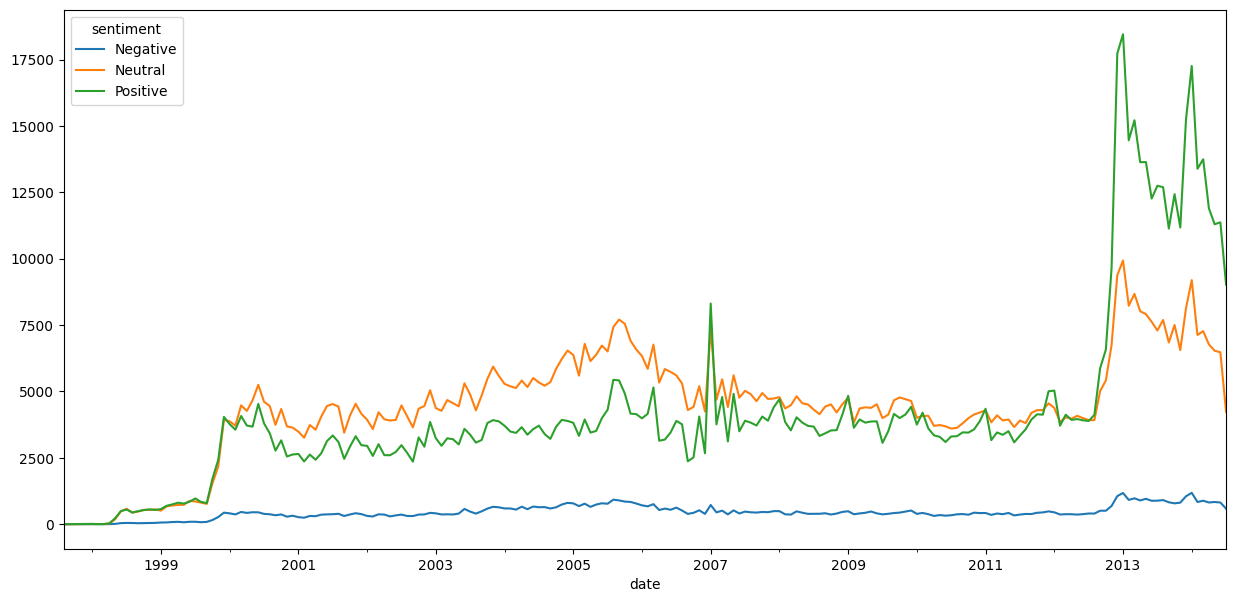

In [ ]:
cd_df.plot(kind='line',figsize=(15,7))

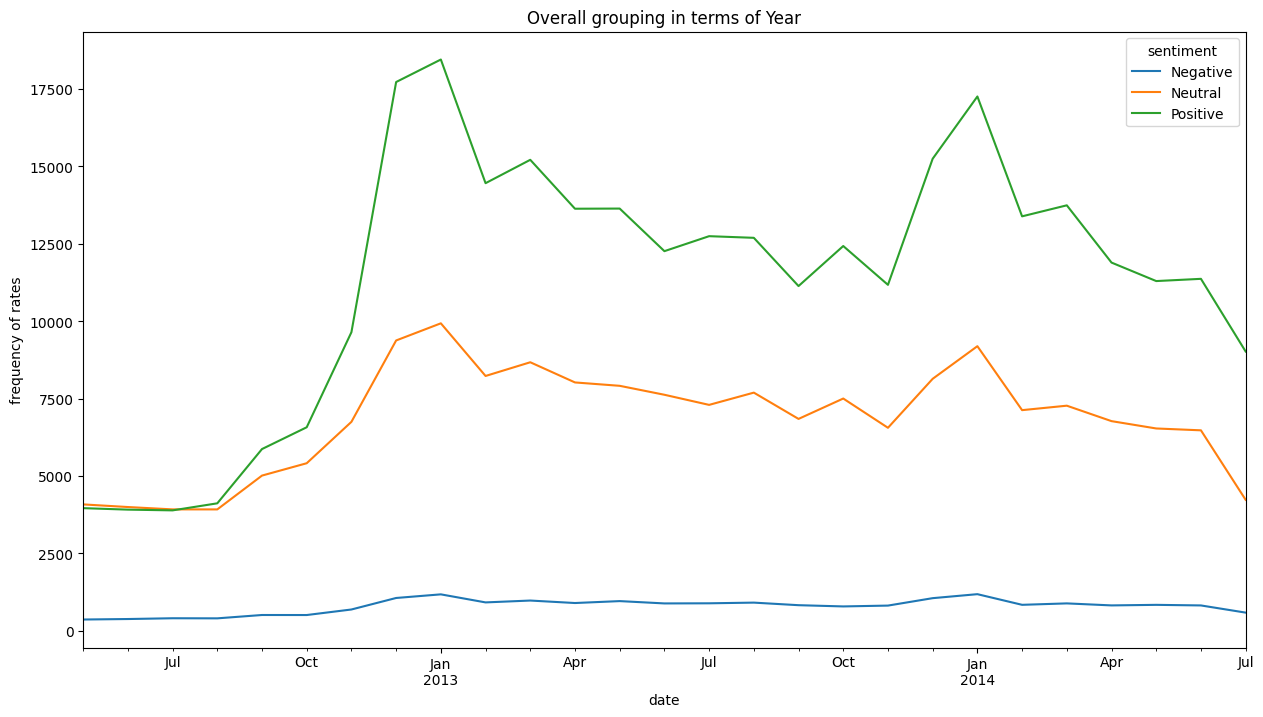

In [ ]:
# as we have very much less data before 2012 ,so we are filtering the data before 2010

cd_df=cd_df[cd_df.index>='2012-05-01']
cd_df.plot(kind = 'line', figsize= (15, 8))
plt.ylabel('frequency of rates')
plt.title ('Overall grouping in terms of Year');

In [ ]:
# spitting it on  the basis of sentiment

positive=cd_df['Positive']
neutral=cd_df['Neutral']
negative=cd_df['Negative']

## On positive sentiment

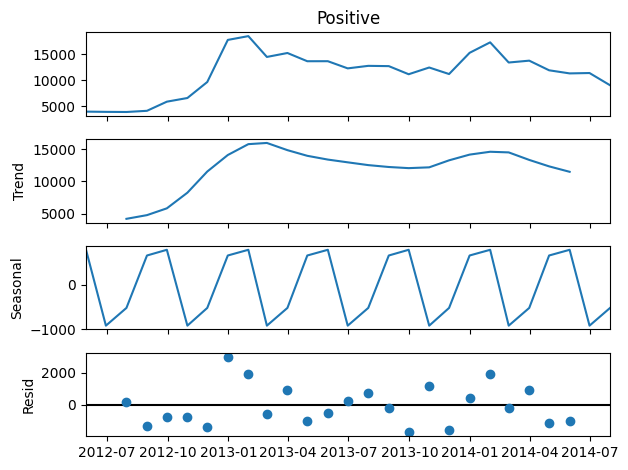

In [ ]:
decomp=seasonal_decompose(positive,period=4)

decomp.plot();

In [ ]:
checkStationarity(positive)

('Data is not Stationary.', 0.2798016805899544)

In [ ]:
# Calculate a 5-day moving average
window = 5
positive_m = positive.rolling(window=window).mean().dropna()

checkStationarity(positive_m)

('Data is Stationary', 3.830232582648051e-21)

<Axes: xlabel='date'>

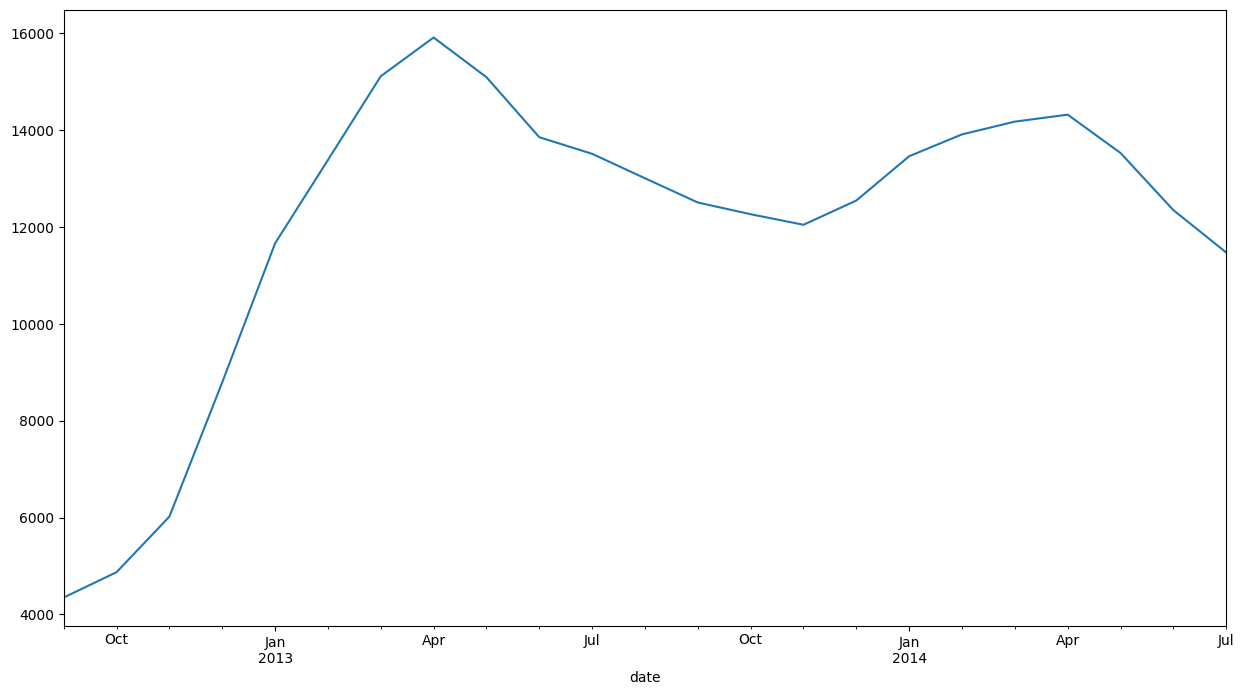

In [ ]:
positive_m.plot(kind='line',figsize=(15,8))

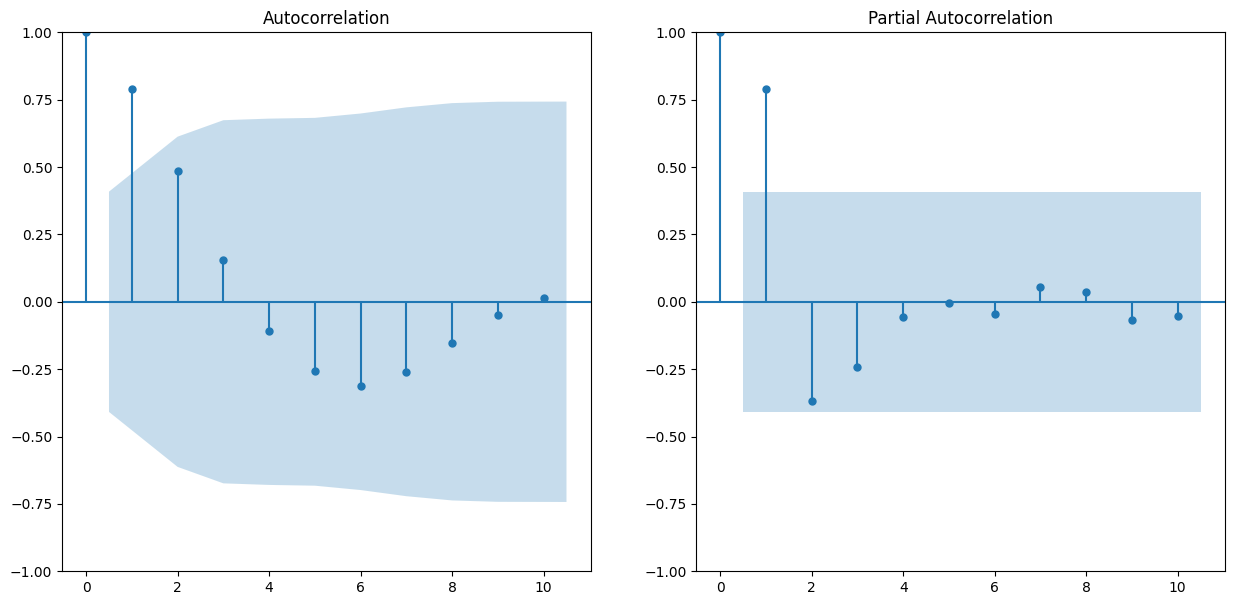

In [ ]:
#plotting correlogram for positive sentiment data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(positive_m,lags=10,ax=ax[0])
plot_pacf(positive_m,lags=10,ax=ax[1])
plt.show()

 * by analysing the both graphs we will take

 ** p=[1,2,3]
 ** d=0
 ** q=[1,2,3]

In [ ]:
seasonal_positive_cd=decomp.seasonal

In [ ]:
def plot_correlogram(data, lags=10):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    plot_acf(data, lags=lags, ax=ax[0])
    plot_pacf(data, lags=lags, ax=ax[1])
    plt.show()

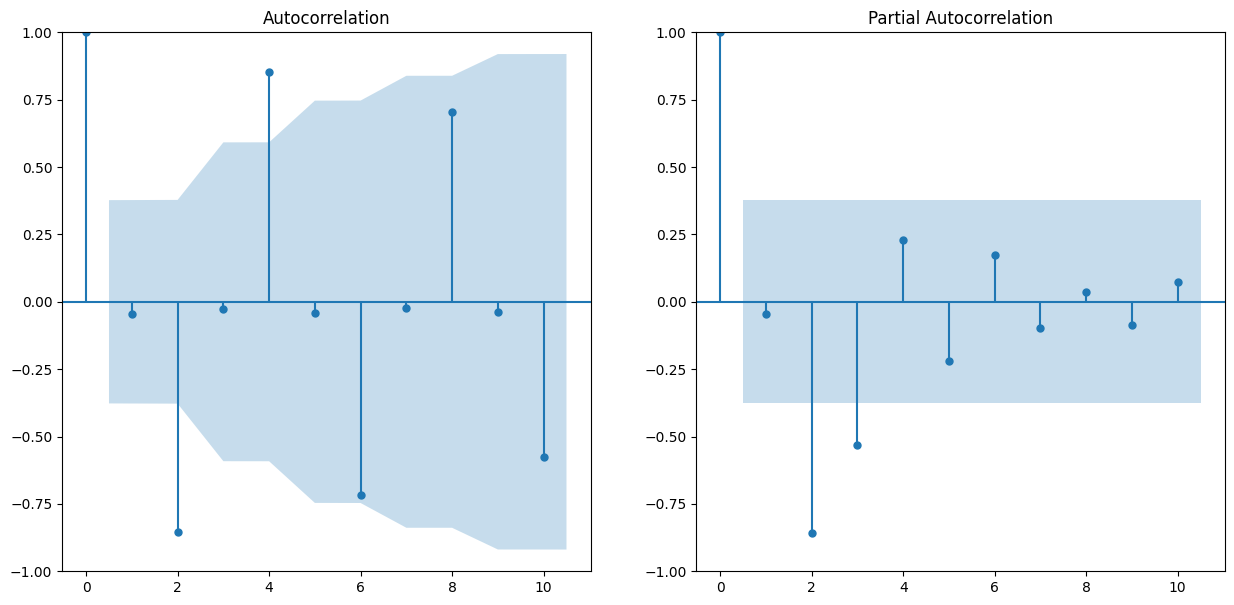

In [ ]:

#plotting correlogram for seasonality
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(seasonal_positive_cd,lags=10,ax=ax[0])
plot_pacf(seasonal_positive_cd,lags=10,ax=ax[1])
plt.show()

 * by analysing the both graphs we will take

 ** p=[1,2,3]
 ** d=0
 ** q=[1,2,3]

In [ ]:
# spliting the data to train and test
samp_size=int(len(positive_m)*0.7)
train_p=positive_m[:samp_size]
test_p=positive_m[samp_size:]

In [ ]:
# Define ranges for p, d, q, P, D, Q
p_range = range(1,4)
q_range = range(1,4)
P_range = range(1,4)
Q_range = range(1,4)

In [ ]:
# Initialize lists to store results
results_aic = []


# Loop through all combinations of orders
for p, q, P, Q in product(p_range, q_range, P_range, Q_range):
    try:
        model = sm.tsa.SARIMAX(train_p, order=(p, 0, q), seasonal_order=(P, 0, Q, 12), enforce_stationarity=True)
        results = model.fit()
        results_aic.append((p, q, P, Q, results.aic))
    except Exception as e:
        print(f"Error fitting model with order ({p}, {q}, {P}, {Q}): {e}")
        continue

Error fitting model with order (1, 3, 1, 2): LU decomposition error.
Error fitting model with order (3, 1, 1, 3): LU decomposition error.
Error fitting model with order (3, 1, 3, 2): LU decomposition error.


In [ ]:
# Create dataframes from results
columns = ['p', 'q', 'P',  'Q', 'AIC']
df_aic_p = pd.DataFrame(results_aic, columns=columns)

df_aic_p=df_aic_p.sort_values(by=['AIC'],ascending=True)
df_aic_p.head()

,p,q,P,Q,AIC
26,2,1,1,1,268.994451
53,3,1,1,1,270.375573
35,2,2,1,1,270.429283
29,2,1,2,1,271.064949
27,2,1,1,2,271.133902


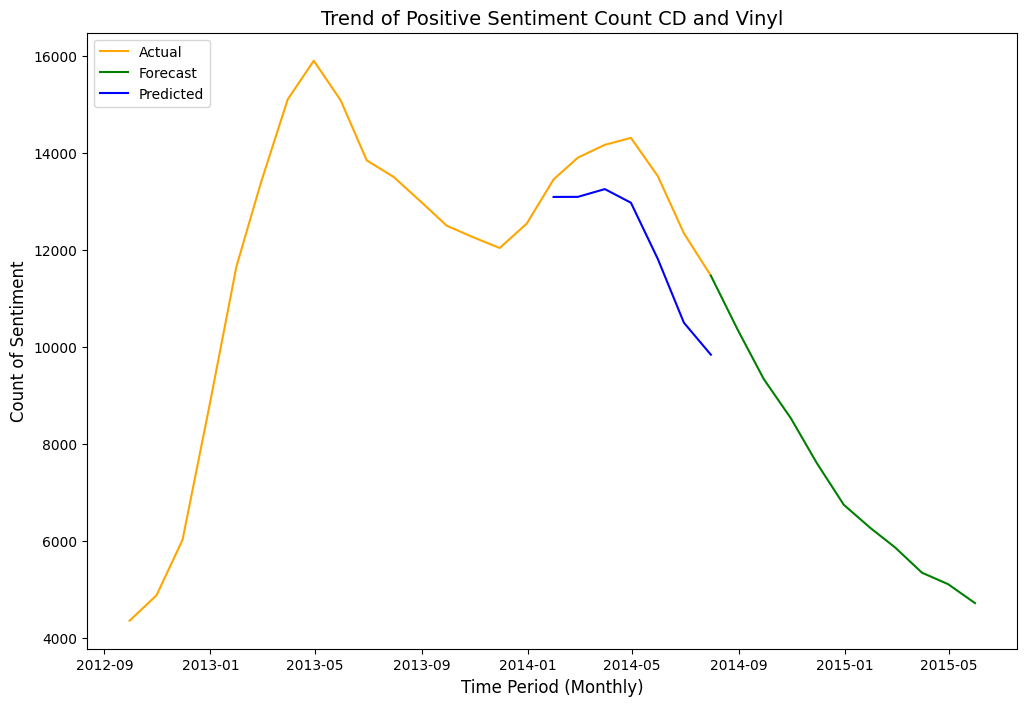

In [ ]:
# Time Series Analysis plot for Actual,Predicted and Forecast
TSAplots(data=positive_m,train=train_p,test=test_p,p=2,d=0,q=1,P=1,Q=1,D=0,title="Trend of Positive Sentiment Count CD and Vinyl")


In [ ]:
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Positive   No. Observations:                   16
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -128.497
Date:                            Sun, 20 Aug 2023   AIC                            268.994
Time:                                    13:36:47   BIC                            273.630
Sample:                                09-30-2012   HQIC                           269.232
                                     - 12-31-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6597      0.528      3.143      0.002       0.625       2.695
ar.L2         -0.6947      0.539     -1.288      0.198      -1.752       0.362
ma.L1          0.7592      0.557      1.363      0.173      -0.332       1.850
ar.S.L12       0.6533      5.779      0.113      0.910     -10.674      11.981
ma.S.L12      -0.0514      9.786     -0.005      0.996     -19.231      19.129
sigma2      2.563e+05   3.95e+05      0.648      0.517   -5.18e+05    1.03e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.91   Prob(JB):                         0.45
Heteroskedasticity (H):               0.18   Skew:                             0.77
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## On neutral sentiment

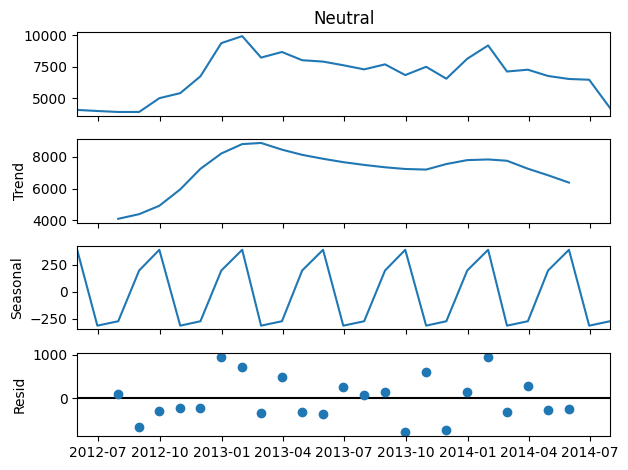

In [ ]:
decomp=seasonal_decompose(neutral,period=4)

decomp.plot();

In [ ]:
checkStationarity(neutral)

('Data is not Stationary.', 0.4238000103924081)

In [ ]:
# Calculate a 5-day moving average
window = 5
neutral_m = neutral.rolling(window=window).mean().dropna()

checkStationarity(neutral_m)

('Data is Stationary', 0.0008599423878575574)

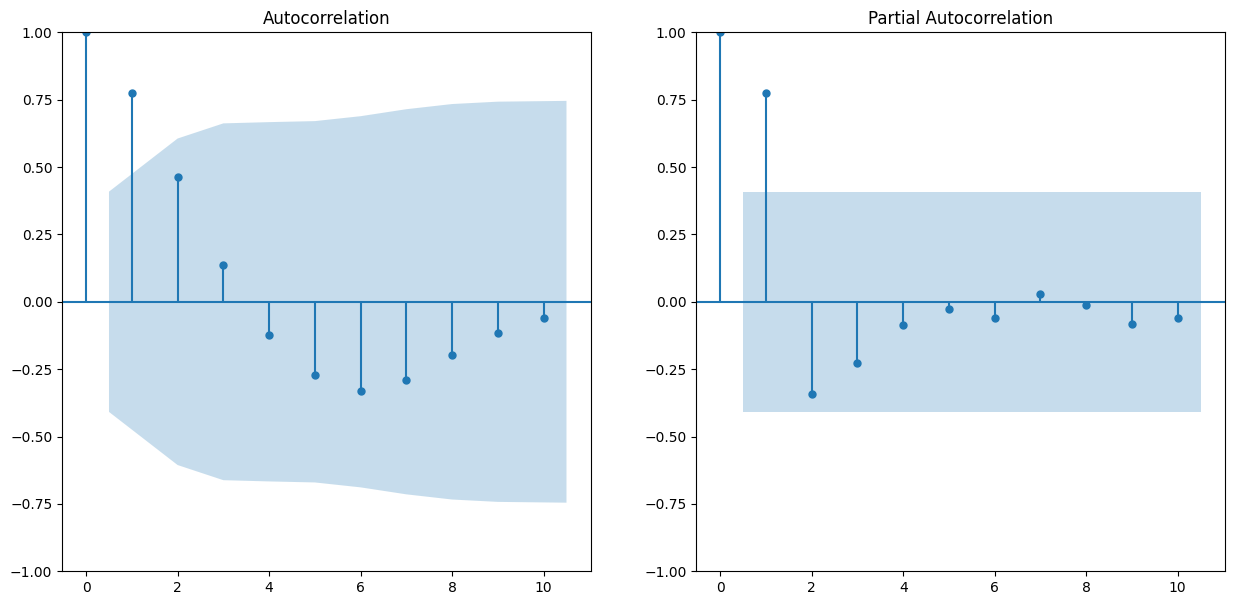

In [ ]:
#plotting correlogram for positive sentiment data
plot_correlogram(neutral_m)

 * by analysing the both graphs we will take

 ** p=[1,2,3]
 ** d=0
 ** q=[1,2,3]

In [ ]:
neutral_seasonal=decomp.seasonal

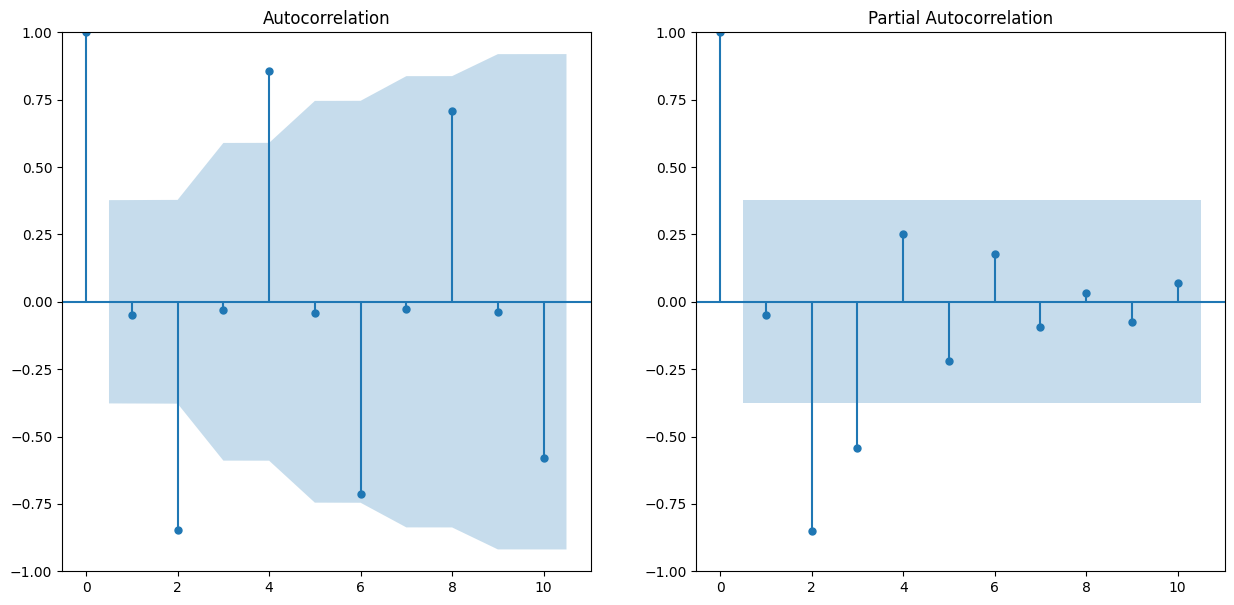

In [ ]:
plot_correlogram(neutral_seasonal)

 * by analysing the both graphs we will take

 ** p=[1,2]
 ** d=0
 ** q=[1,2]

In [ ]:
# spliting the data to train and test
samp_size=int(len(neutral_m)*0.7)
train_n=neutral_m[:samp_size]
test_n=neutral_m[samp_size:]

In [ ]:
# Define ranges for p, d, q, P, D, Q
p_range = range(1,4)
q_range = range(1,4)
P_range = range(1,3)
Q_range = range(1,3)

In [ ]:
# Initialize lists to store results
results_aic = []


# Loop through all combinations of orders
for p, q, P, Q in product(p_range, q_range, P_range, Q_range):
    try:
        model = sm.tsa.SARIMAX(train_n, order=(p, 0, q), seasonal_order=(P, 0, Q, 12), enforce_stationarity=True)
        results = model.fit()
        results_aic.append((p, q, P, Q, results.aic))
    except Exception as e:
        print(f"Error fitting model with order ({p}, {q}, {P}, {Q}): {e}")
        continue

In [ ]:
# Create dataframes from results
columns = ['p', 'q', 'P',  'Q', 'AIC']
df_aic_n = pd.DataFrame(results_aic, columns=columns)

df_aic_n=df_aic_n.sort_values(by=['AIC'],ascending=True)
df_aic_n.head()

,p,q,P,Q,AIC
12,2,1,1,1,242.694340
16,2,2,1,1,244.556073
24,3,1,1,1,244.771795
13,2,1,1,2,244.789359
32,3,3,1,1,245.079274


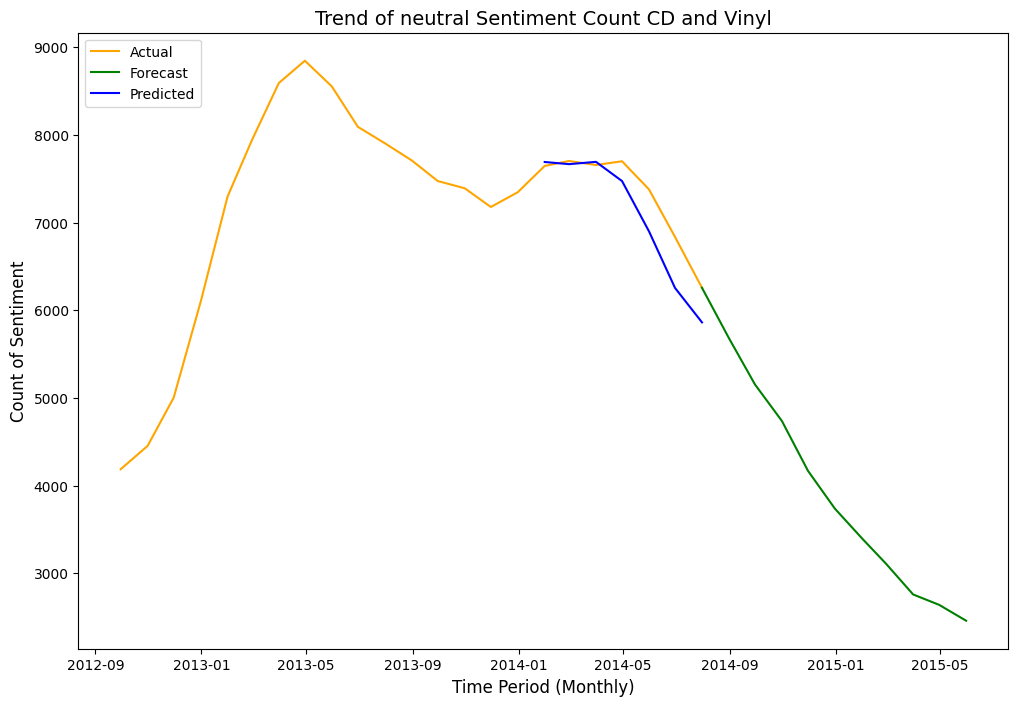

In [ ]:
# Time Series Analysis plot for Actual,Predicted and Forecast
TSAplots(data=neutral_m,train=train_n,test=test_n,p=2,d=0,q=1,P=1,Q=1,D=0,title="Trend of neutral Sentiment Count CD and Vinyl")


In [ ]:
#perform Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


## on Negative sentiment

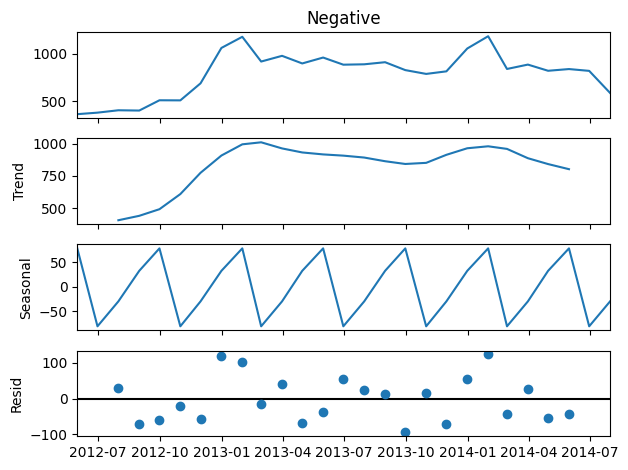

In [ ]:
decomp_neg=seasonal_decompose(negative,period=4)

decomp_neg.plot();

In [ ]:
# checking stationarity

checkStationarity(negative)

('Data is not Stationary.', 0.2405225551393041)

In [ ]:
# Calculate a 4-day moving average
window = 5
negative_m= negative.rolling(window=window).mean().dropna()



checkStationarity(negative_m)

('Data is Stationary', 2.7634406496602278e-11)

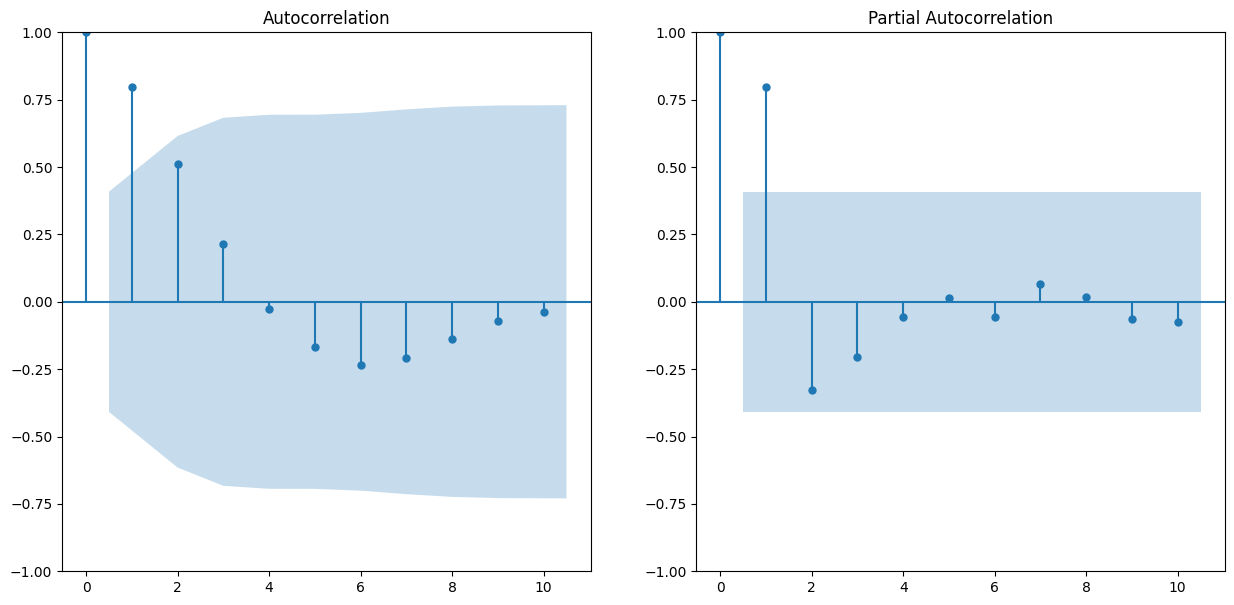

In [ ]:
plot_correlogram(negative_m)

 by analysing the above graph we can take

* * p=[1,2,3]

* * d=0

* * q=[1,2,3]

In [ ]:
negative_seasonal=decomp_neg.seasonal

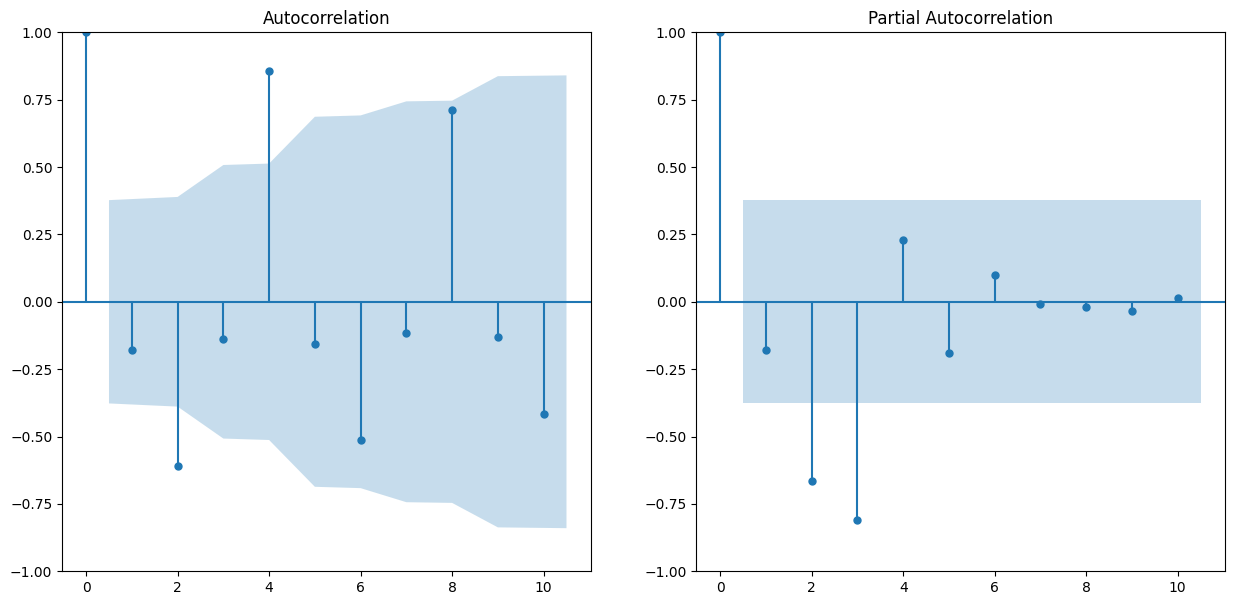

In [ ]:
plot_correlogram(negative_seasonal)

 by analysing the above graph we can take

* * p=[1,2,3]

* * d=0

* * q=[1,2]

In [ ]:
# spliting the data to train and test
samp_size=int(len(negative_m)*0.7)
train_ne=negative_m[:samp_size]
test_ne=negative_m[samp_size:]

In [ ]:
# Define ranges for p, d, q, P, D, Q
p_range = range(1,4)
q_range = range(1,4)
P_range = range(1,3)
Q_range = range(1,3)

In [ ]:
# Initialize lists to store results
results_aic = []


# Loop through all combinations of orders
for p, q, P, Q in product(p_range, q_range, P_range, Q_range):
    try:
        model = sm.tsa.SARIMAX(train_ne, order=(p, 0, q), seasonal_order=(P, 0, Q, 12), enforce_stationarity=True)
        results = model.fit()
        results_aic.append((p, q, P, Q, results.aic))
    except Exception as e:
        print(f"Error fitting model with order ({p}, {q}, {P}, {Q}): {e}")
        continue

In [ ]:
# Create dataframes from results
columns = ['p', 'q', 'P',  'Q', 'AIC']
df_aic_ne = pd.DataFrame(results_aic, columns=columns)

df_aic_ne=df_aic_ne.sort_values(by=['AIC'],ascending=True)
df_aic_ne.head()

,p,q,P,Q,AIC
12,2,1,1,1,174.904566
20,2,3,1,1,176.656341
16,2,2,1,1,176.873277
13,2,1,1,2,177.210446
24,3,1,1,1,177.247193


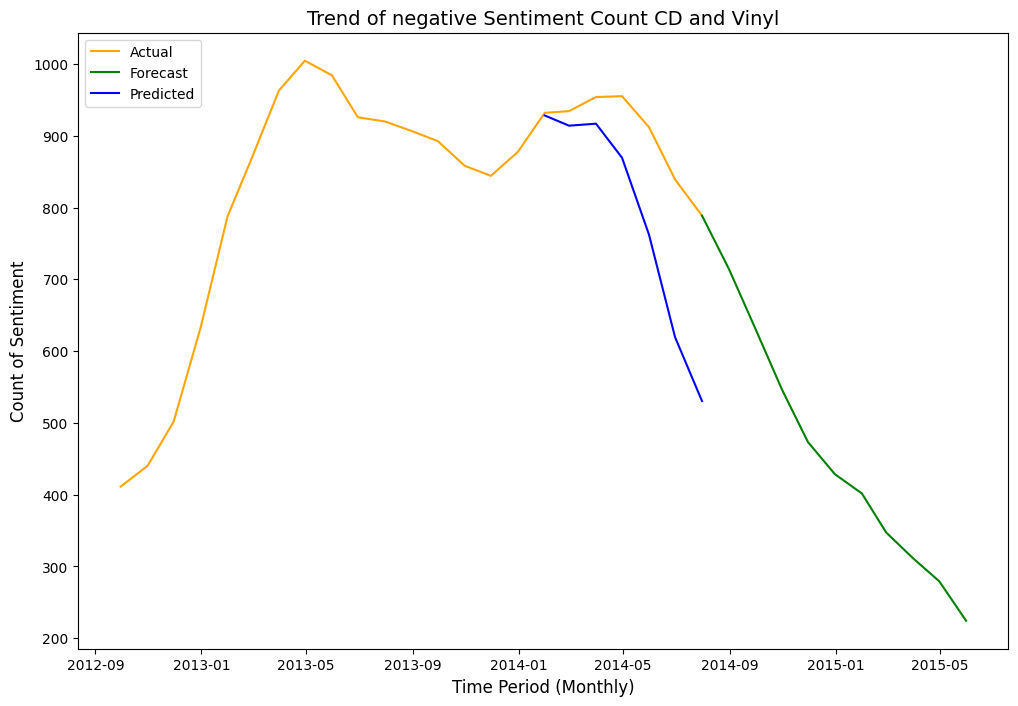

In [ ]:
# Time Series Analysis plot for Actual,Predicted and Forecast
TSAplots(data=negative_m,train=train_ne,test=test_ne,p=2,d=0,q=3,P=1,Q=1,D=0,title="Trend of negative Sentiment Count CD and Vinyl")


In [ ]:
#perform Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [ ]:
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Negative   No. Observations:                   16
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 12)   Log Likelihood                 -80.328
Date:                              Sun, 20 Aug 2023   AIC                            176.656
Time:                                      16:10:16   BIC                            182.837
Sample:                                  09-30-2012   HQIC                           176.973
                                       - 12-31-2013                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9908      0.004    507.779      0.000       1.983       1.998
ar.L2         -0.9990      0.002   -434.941      0.000      -1.003      -0.994
ma.L1          0.4508      2.944      0.153      0.878      -5.319       6.220
ma.L2         -0.5160      1.340     -0.385      0.700      -3.142       2.110
ma.L3         -0.9267      4.570     -0.203      0.839      -9.885       8.031
ar.S.L12       0.9523      0.111      8.563      0.000       0.734       1.170
ma.S.L12       0.9871      4.976      0.198      0.843      -8.766      10.740
sigma2        28.4505      0.174    163.118      0.000      28.109      28.792
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.54   Prob(JB):                         0.85
Heteroskedasticity (H):               0.83   Skew:                             0.07
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.64e+19. Standard errors may be unstable.
"""